# **Data Collection and Preprocessing** <br>
**Banking Customer Churn (raw data)** <br>
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

path = "./data/Churn_Modelling.csv"
raw_data = pd.read_csv(path)
raw_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Raw data check null value**

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
raw_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Ignore unused columns** <br>
For this analysis, the column "RowNumber", "CustomerId", "Balance", "Surname" will not be taken into consideration for our analysis

In [55]:
data = raw_data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **General visualizations**
- The subsequent graphs aid in gaining a clearer understanding of the features by displaying the distribution of each feature separately. This provides insight into the variation and likelihood associated with each feature before delving deeper into the analysis.<br>
- To facilitate data comprehension, only the initial 50 entries will be considered for this visualization. <br>
- This method emulates the selection of a sample comprising 50 values from the entire dataset. While the outcome may vary, the fundamental steps of this process remain consistent, with the exception of the input data.

In [ ]:
visualizing_data = data[:50]
visualizing_data

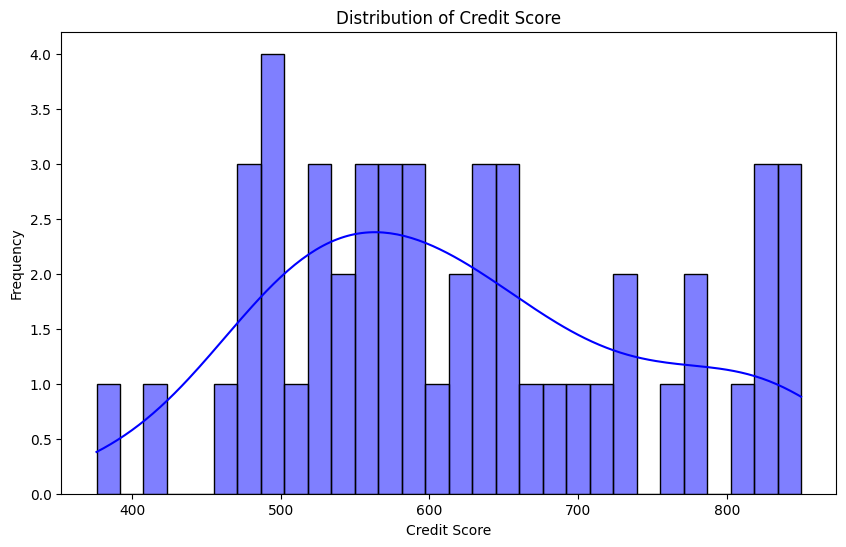

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['CreditScore'], kde=True, color='blue', bins=30)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

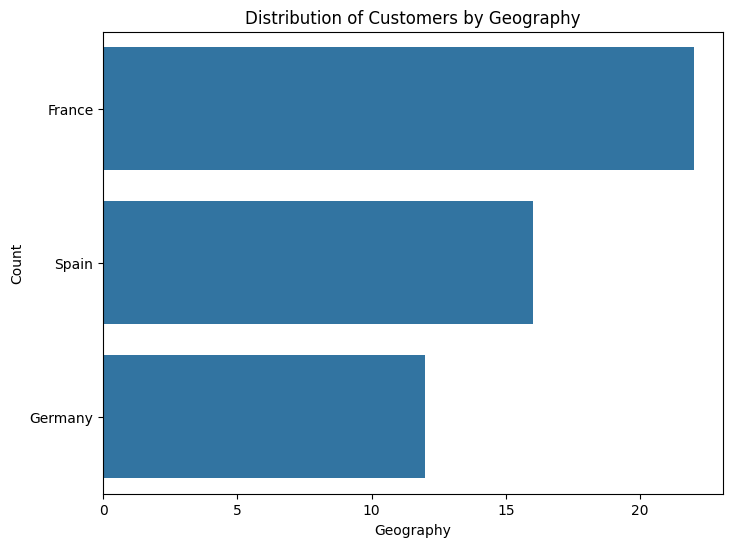

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(visualizing_data['Geography'])
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

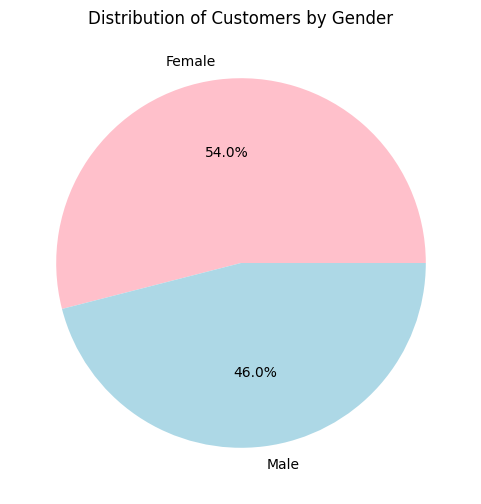

In [34]:
plt.figure(figsize=(6, 6))
visualizing_data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Distribution of Customers by Gender')
plt.ylabel('')
plt.show()

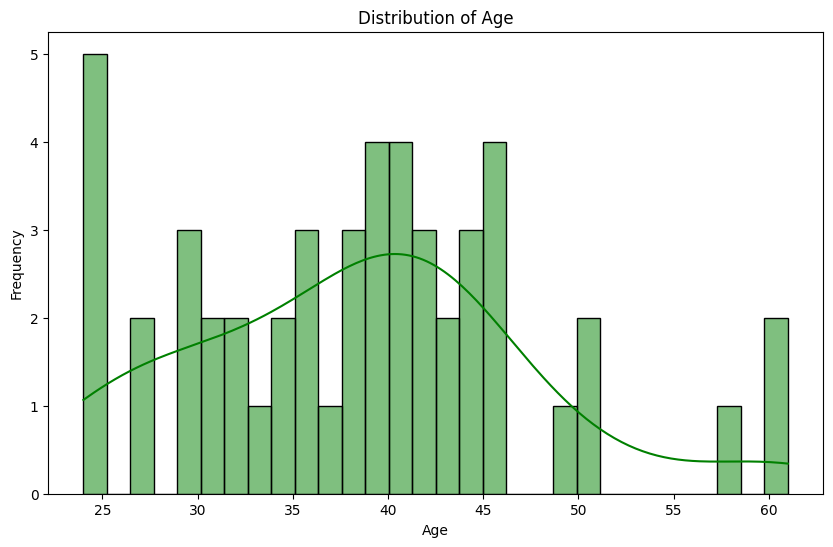

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Age'], kde=True, color='green', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

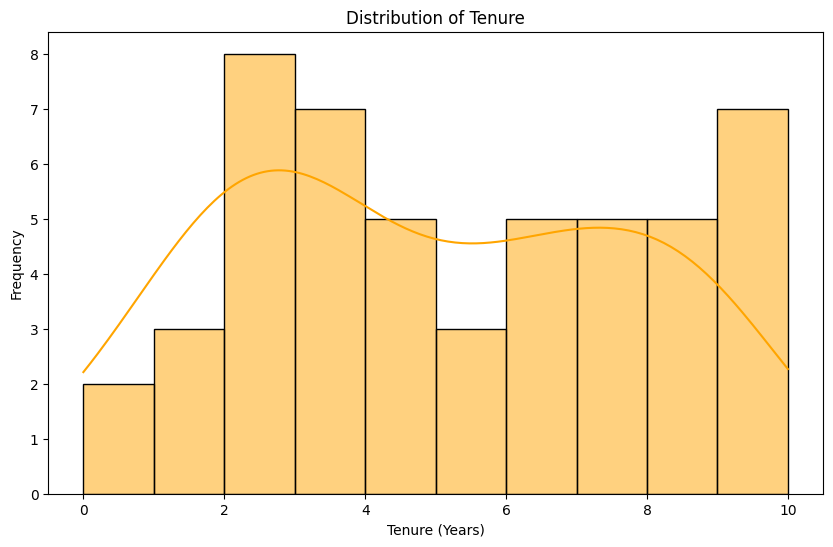

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Tenure'], kde=True, color='orange', bins=10)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

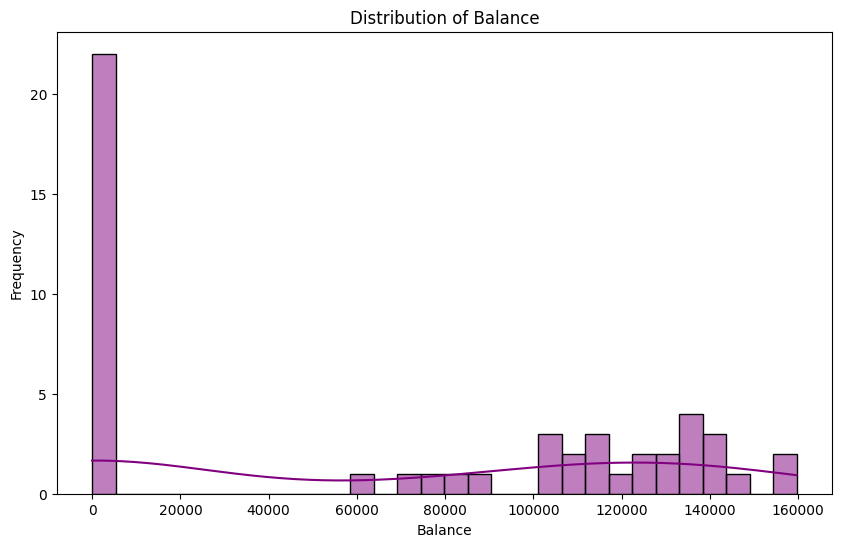

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Balance'], kde=True, color='purple', bins=30)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

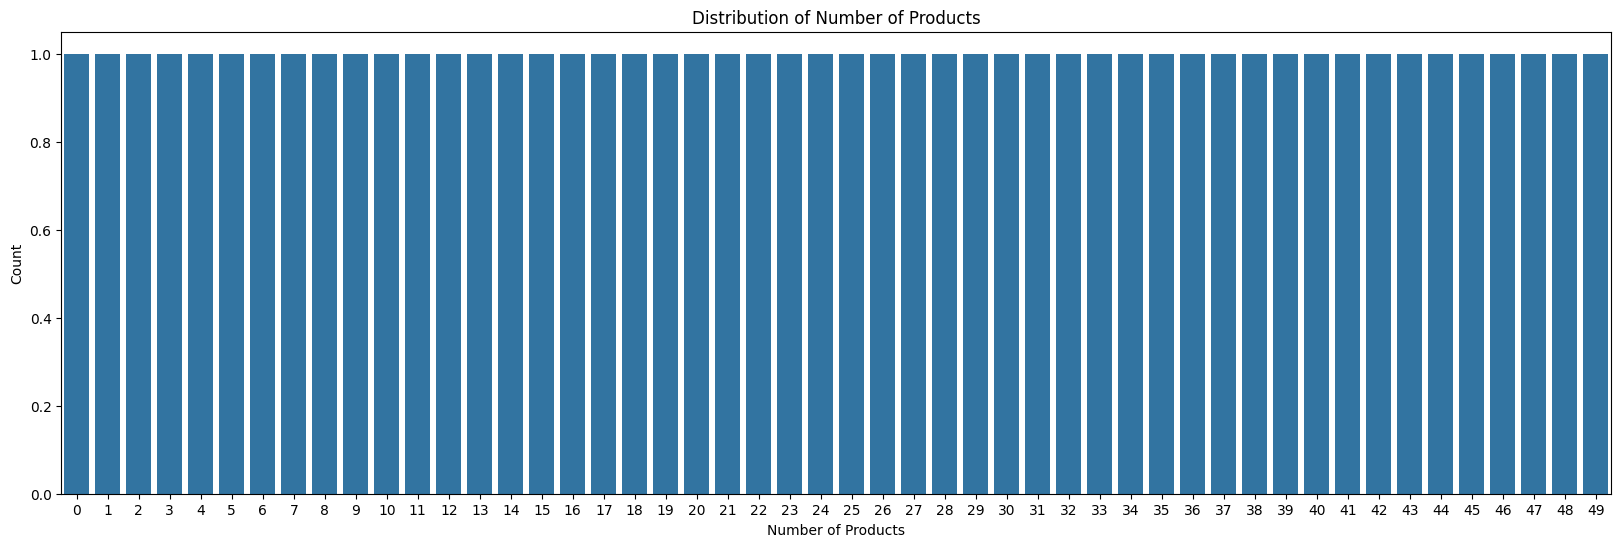

In [38]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['NumOfProducts'])
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

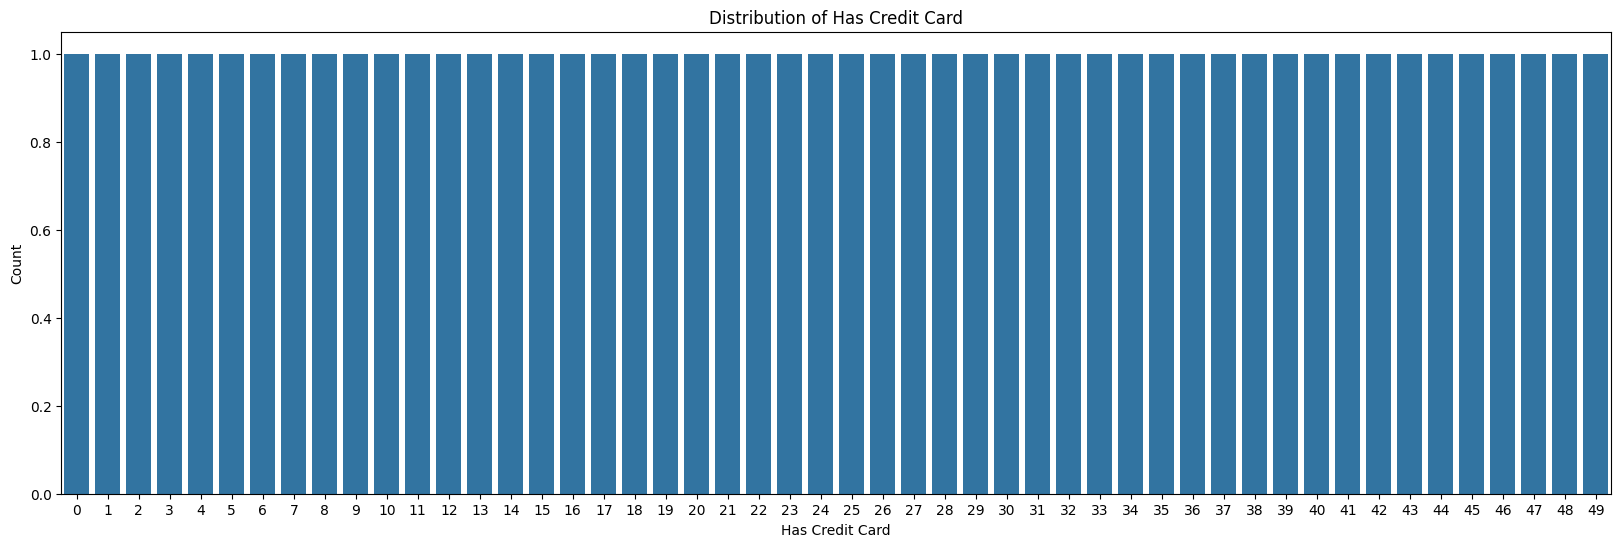

In [39]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['HasCrCard'])
plt.title('Distribution of Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

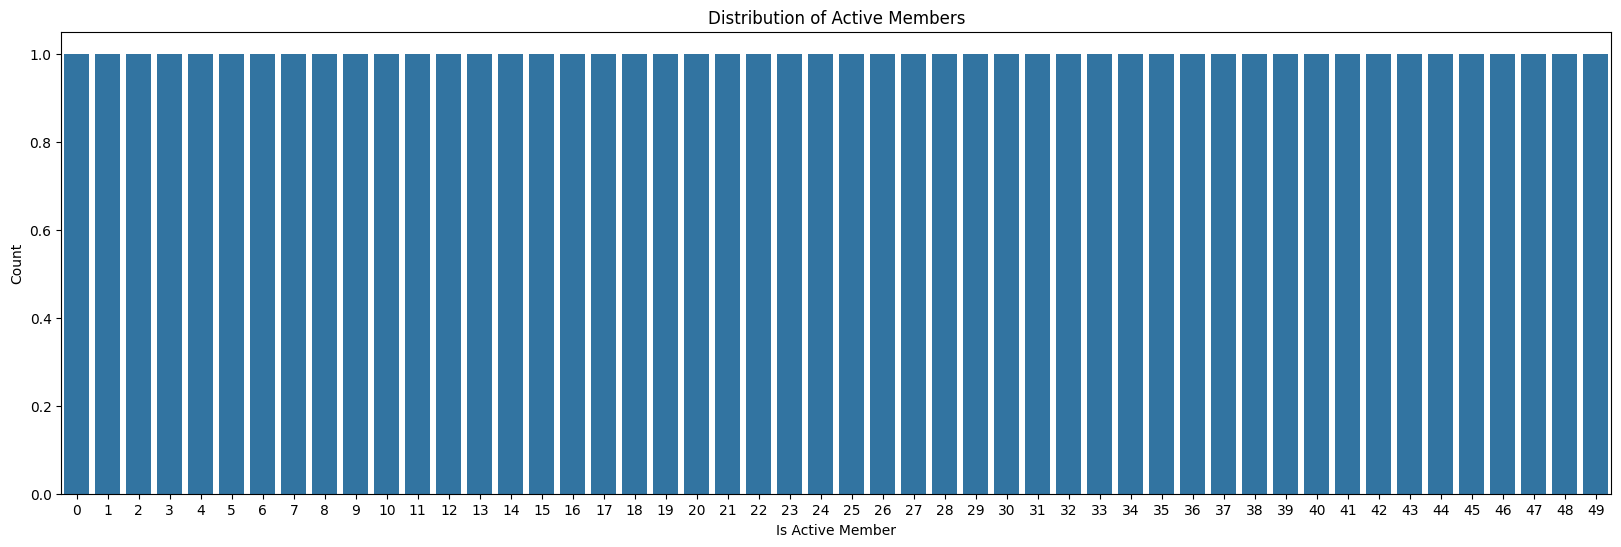

In [40]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['IsActiveMember'])
plt.title('Distribution of Active Members')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

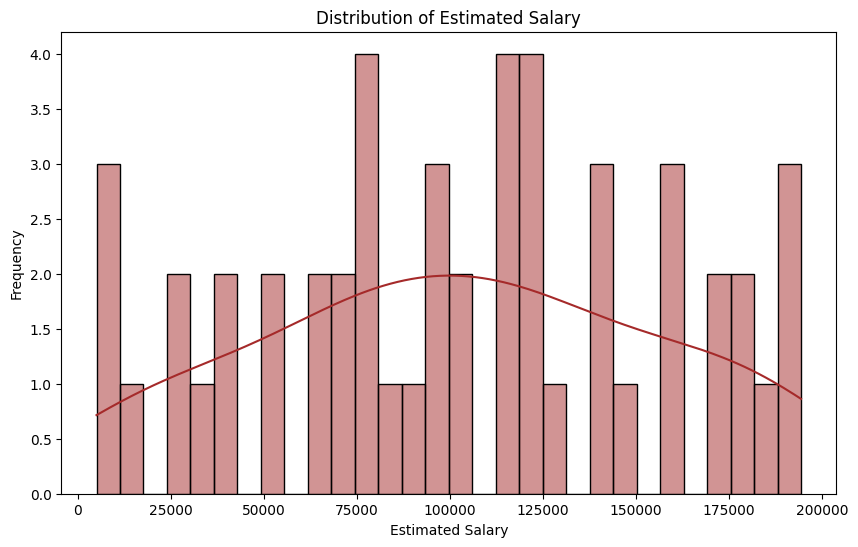

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['EstimatedSalary'], kde=True, color='brown', bins=30)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

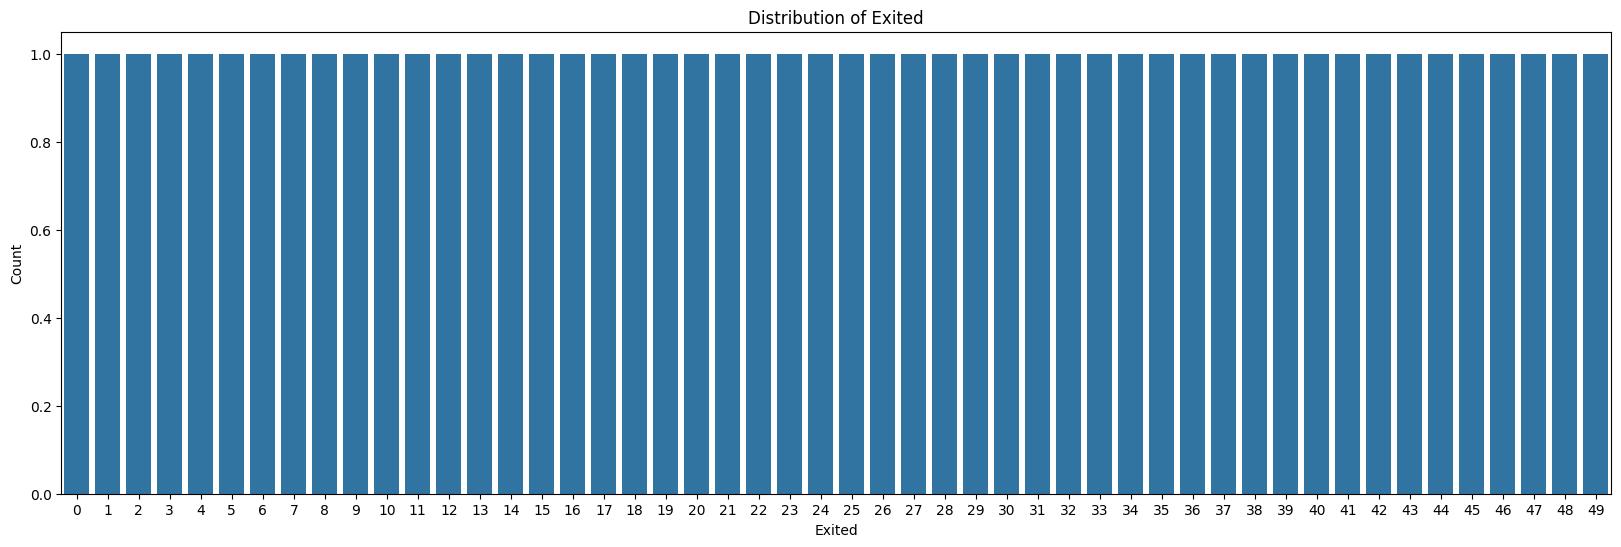

In [42]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['Exited'])
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# **Regression Analysis**
We only make use of Column "CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Exited", "Geography", "Gender" for the 

In [43]:
data = pd.get_dummies(data = data,drop_first=False).astype(int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,1,0,0,1,0
9998,772,42,3,75075,2,1,0,92888,1,0,1,0,0,1


In [44]:
y = data["Balance"]
X = data.drop(["HasCrCard", "IsActiveMember", "Exited", "Balance"], axis=1)

**Target variable**

In [45]:
y

0            0
1        83807
2       159660
3            0
4       125510
         ...  
9995         0
9996     57369
9997         0
9998     75075
9999    130142
Name: Balance, Length: 10000, dtype: int32

**Features**

In [46]:
X

,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,1,101348,1,0,0,1,0
1,608,41,1,1,112542,0,0,1,1,0
2,502,42,8,3,113931,1,0,0,1,0
3,699,39,1,2,93826,1,0,0,1,0
4,850,43,2,1,79084,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,2,96270,1,0,0,0,1
9996,516,35,10,1,101699,1,0,0,0,1
9997,709,36,7,1,42085,1,0,0,1,0
9998,772,42,3,2,92888,0,1,0,0,1


**Multiple Regression Model** <br>
The general equation for multiple regression model is: <br>
**<center>y = b0 + b1x1 + b2x2 + ... + bnxn + e</center>** <br>
<center>(where b0 is the y-intercept, b1 to bn are the coefficients which represents the change in dependent variable for one unit change in the corresponding independent varible, e is the error) </center> <br>
For better result, we set the test_size = 0.2 which means 80% of the data will be used for training and the rest will be used for testing.


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

**Coefficient of determination** <br>
The coefficient of determination (R2) tells us how much can the variables explain the variation of Balance

In [50]:
r2 = r2_score(y_test, y_pred)
r2

0.24660846345192544

**Mean Absolute Error** <br>
The mean absolute error indicate that, on average, the model's predictions are off by that specific number

In [51]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

46621.69491961199

**Mean Squared Error** <br>
The mean squared error indicate the average squared difference between the estimated values and the actual value

In [52]:
MSE = mean_squared_error(y_test, y_pred)
MSE

2907114377.728217

**Model Intercept** <br>
The y-intercept of the linear regression (which is b0 in the general equation provided above)

In [53]:
print(f"Intercept: {model.intercept_}")

Intercept: 123421.84330825182


**Model Coefficients** <br>
The model coefficients are from b1 to b10 in the general equation provided above. The first 5 results in the model coefficient array represents the 6 numerical features:
- CreditScore
- Age
- Tenure
- NumOfProducts
- EstimatedSalary

The next 3 coefficients in the array represents the unique values of column Geography:
- Geography_France
- Geography_Germany
- Geography_Spain

The last 3 coefficients in the array represents the unique values of column Gender:
- Gender_Female
- Gender_Male

In [54]:
print(f"Coefficients: {model.coef_}")

Coefficients: [ 7.29016555e+00  6.64438735e+00 -1.25545210e+02 -3.15275578e+04
  1.23514306e-02 -1.92636079e+04  3.88234772e+04 -1.95598693e+04
 -8.28933417e+02  8.28933417e+02]
